# 3.1 Pre-processing and Transformation

Student ID : F032273

This notebook focuses on data processing and feature selection using the custom made Bamboo library. It provides various functions and pipelines for data preprocessing, feature selection, and analysis.

### Data Processing Pipelines
The `gwp_pipeline.py` and `star_pipeline.py` files contain the logic and flow of all the data processing steps specific to the GWP and STAR datasets, respectively. These pipelines handle tasks such as data cleaning, feature engineering, and scaling. The imported functions gwp_pipeline and star_pipeline encapsulate these pipelines and return the processed datasets.

In [144]:
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

from bamboo.gwp_pipeline import gwp_pipeline
from bamboo.star_pipeline import star_pipeline
from bamboo.processing import read_csv, split_features_and_target, get_feature_and_target_names, print_table_from_array
from bamboo.selection import *

SEED = 42
GWP_CSV = 'datasets/gwp_assessment.csv'
STAR_CSV = 'datasets/star_assessment.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load the data

In [79]:
# Load data from csv
gwp_data = read_csv(GWP_CSV)
star_data = read_csv(STAR_CSV)

print_table_from_array(gwp_data, 5)
print('\n')
print_table_from_array(star_data, 5)


date     | quarter  | department | day      | team | targeted_productivity | smv   | wip  | over_time | incentive | idle_time | idle_men | no_of_style_change | no_of_workers | actual_productivity
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1/1/2015 | Quarter1 | sweing     | Thursday | 8    | 0.8                   | 26.16 | 1108 | 7080      | 98        | 0.0       | 0        | 0                  | 59.0          | 0.940725424        
1/1/2015 | Quarter1 | finishing  | Thursday | 1    | 0.75                  | 3.94  | -1   | 960       | 0         | 0.0       | 0        | 0                  | 8.0           | 0.8865             
1/1/2015 | Quarter1 | sweing     | Thursday | 11   | 0.8                   | 11.41 | 968  | 3660      | 50        | 0.0       | 0        | 0                  | 30.5          | 0.800570492        
1/1/2015 | Quarter1 

#### Process the data
The data is processed using a pipeline function that accounts for every single processing technique.

In [145]:
# Process data
gwp_dataset = gwp_pipeline(gwp_data, seed=SEED)
star_dataset = star_pipeline(star_data, seed=SEED)

print_table_from_array(gwp_dataset, 5)
print('\n')
print_table_from_array(star_dataset, 5)

year | month | day_of_month | quarter | department | day | team | targeted_productivity | smv   | wip    | over_time | incentive | idle_time | idle_men | no_of_style_change | no_of_workers | actual_productivity
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2015 | 1     | 1            | 0.0     | 1.0        | 3.0 | 8.0  | 0.8                   | 26.16 | 1108.0 | 7080.0    | 98.0      | 0.0       | 0.0      | 0.0                | 59.0          | 0.940725424        
2015 | 1     | 1            | 0.0     | 0.0        | 3.0 | 1.0  | 0.75                  | 3.94  | -1.0   | 960.0     | 0.0       | 0.0       | 0.0      | 0.0                | 8.0           | 0.8865             
2015 | 1     | 1            | 0.0     | 1.0        | 3.0 | 11.0 | 0.8                   | 11.41 | 968.0  | 3660.0    | 50.0      | 0.0       | 0.0      | 0.

### Filter method for feature selection

Two methods used to filter out insignificant features and help determine each feature's relative importance. 

#### 1. Removing Near-Constant Features
- Very low variance across all instances in the dataset. 
- Do not contribute much useful information to the model.

#### 2. Correlation Coefficients Between Input Features and the Target Variable
- Interprets the linear relationship between each feature and the target variable.

### GWP Feature Selection

In [143]:
# Split feature and target sets
X_gwp, y_gwp = split_features_and_target(gwp_dataset)
X_gwp_names, y_gwp_name = get_feature_and_target_names(gwp_dataset)

#### Near-constant features

In [129]:
constant_threshold = 0.01
selected_columns, constant_columns = get_const_features(X_gwp, X_gwp_names, threshold=constant_threshold)

print('Selected columns:', selected_columns)
print('Constant columns:', constant_columns)

Selected columns: ['month', 'day_of_month', 'quarter', 'department', 'day', 'team', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
Constant columns: ['year', 'targeted_productivity']


#### Feature correlation
If we take a closer look at the coefficients we can see that year, smv, and targeted_productivity are `NaN`, indicating that there is no correlation between these feature & target values.    



Low correlation features: ['year', 'day', 'wip']


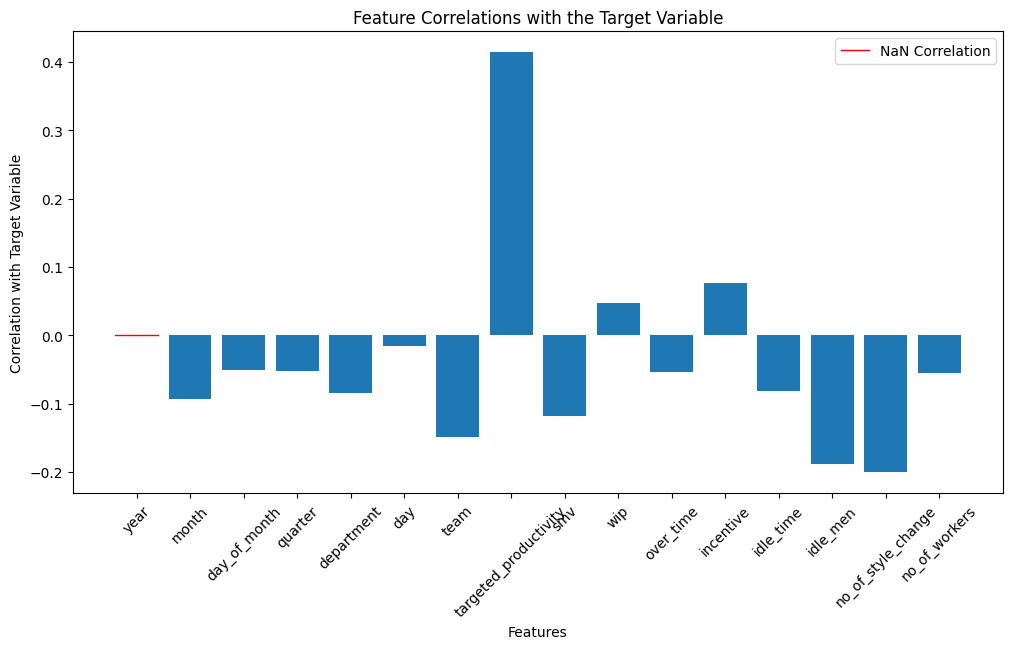

In [137]:

correlation_threshold = 0.05
feature_correlations = get_feature_correlations(X_gwp, y_gwp, X_gwp_names)
low_correlation_features = get_low_correlation_features(feature_correlations, threshold=correlation_threshold)

print ('Low correlation features:', low_correlation_features)
plot_feature_correlations(feature_correlations)

### STAR Feature Selection

In [138]:
# Split feature and target sets
X_star, y_star = split_features_and_target(star_dataset)
X_star_names, y_star_name = get_feature_and_target_names(star_dataset)

#### Near-constant features

In [139]:
constant_threshold = 0.01
selected_columns, constant_columns = get_const_features(X_star, X_star_names, threshold=constant_threshold)

print('Selected columns:', selected_columns)
print('Constant columns:', constant_columns)


Selected columns: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'fiber_ID']
Constant columns: []


#### Feature correlation

Correlation features under 0.01: ['z', 'rerun_ID', 'MJD']


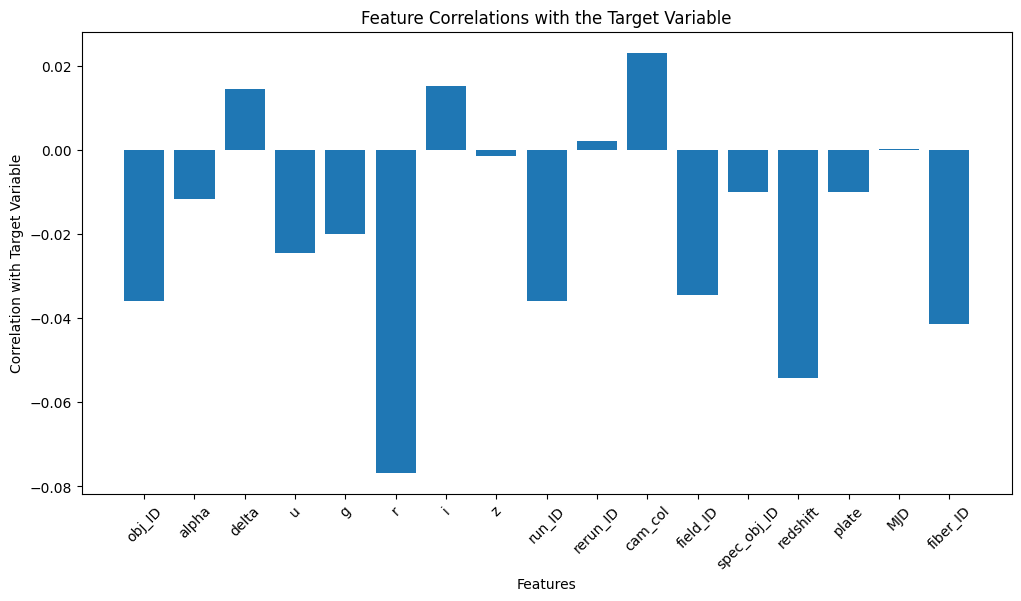

In [140]:
correlation_threshold = 0.01

feature_correlations = get_feature_correlations(X_star, y_star, X_star_names)
low_correlation_features = get_low_correlation_features(feature_correlations, threshold=correlation_threshold)

print(f'Correlation features under {correlation_threshold}: {low_correlation_features}')
plot_feature_correlations(feature_correlations)

## Markdown Question: 
**Question**

Explain the logic behind usage of pearson correlation coefficient for feature selection.

**Answer**

It is a statistical measure that describes the degree of linear relationship between two variables. In our context, we use this measurement to identify how features in the dataset correlate with the target values, or with other features. This important for the following reasons:
- Estimating how similar two features are two eachother: By computing the pearson correlation between each feature with the target set, we can identify what features have strong linear relationships with the target. This in turn allows us to know about any features that have little to no relationship with the target set. Knowing this information can allow us to make more informed decisions on how to process the dataset e.g. which features can be removed, and how many can be removed with little cost to training efficiency and accuracy.
- Estimating importance of features to the target set: Computing pearson correlation between features can help identify pairs of features that highly correlate to eachother. Such information is useful because we can remove redundencies by getting rid of features which have high correlations to others. 